In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [2]:
#os.chdir('C:\\Users\\Rai\\Google Drive\\Enrollment and Student Affairs\\Retention\\Descriptive')
os.chdir('/Users/rai/Google Drive/Enrollment and Student Affairs/Retention/Descriptive')
os.getcwd()

'C:\\Users\\rai\\Google Drive\\Enrollment and Student Affairs\\Retention\\Descriptive'

# Import and Merge

In [3]:
cols = ["Student_Id", "Housing_Status", "StateOfResidence", "Inst_Rat", "TotalAward", "InstitutionGift", "Total_Gift", "Percent_Need_Met", 
        "PercentNeedMetWithGift", "Need_BasedAwardRecipient", "State", "SZip_Code", "Country", "Date_Birth", "Distance", "HsGpa", "Act_Comp", "Sat_Comp", 
        "Gender", "Housing", "Ethnic_Cd", "Flag_Ethnic", "Race1", "Race2", "Race3", "Race4", "Race5", "Major1_Admit", "Dept1_Admit", "Budget", 
        "Flag_Pell_Eligible", "EFC_9_Month", "Flag_Underrepresented", "Flag_First_Generation", "Flag_Legacy", "Need", "Need_Aid", 
        "Need_Level", "Need_Met", "Need_WGift", "Net_Chgs", "Net_Tuit", "EXCL", "Loan", "GAP", "I__G", "Gift", 'Work']
cols2 = ["Student_Id", 'Entry_Type', 'InSIS']
cols3 = ['Student_Id']

In [4]:
df = pd.read_excel('1_data/20190620.xlsx', sheet_name='Sheet1', usecols = cols, dtype={'Name': str, 'Value': float} )

In [5]:
df.head()

,Student_Id,Housing_Status,StateOfResidence,TotalAward,InstitutionGift,Total_Gift,Percent_Need_Met,PercentNeedMetWithGift,Need_BasedAwardRecipient,State,...,I__G,Loan,Need,Need_Aid,Need_Level,Need_Met,Need_WGift,Net_Chgs,Net_Tuit,Work
0,10318239,R,NaN,0,0,0,0.0,0.0,No,NaN,...,0,0,0,0,NaN,0.0,0.0,53528,40592,0
1,10322215,R,TX,0,0,0,0.0,0.0,No,TX,...,0,0,0,0,NaN,0.0,0.0,53528,40592,0
2,10317478,R,Pan,0,0,0,0.0,0.0,No,Pan,...,0,0,0,0,NaN,0.0,0.0,53528,40592,0
3,10306799,R,LA,18500,13000,13000,0.0,0.0,No,LA,...,13000,0,0,0,NaN,0.0,0.0,40528,27592,0
4,10306833,R,MO,17000,17000,17000,0.0,0.0,No,MO,...,17000,0,0,0,NaN,0.0,0.0,36528,23592,0


In [6]:
db = pd.read_excel('1_data/First-year freshmen_DB.xlsx', sheet_name='Enrolled', usecols = cols2, dtype={'Name': str, 'Value': float} )
db.head()

,Student_Id,Entry_Type,InSIS
0,10321815,FRESHMAN TRADITIONAL,ALASKAN/AM IN
1,10318573,FRESHMAN TRADITIONAL,ALASKAN/AM IN
2,10315897,FRESHMAN TRADITIONAL,Two or more races
3,10318688,FRESHMAN TRADITIONAL,ALASKAN/AM IN
4,10317879,FRESHMAN TRADITIONAL,ALASKAN/AM IN


In [7]:
athlete = pd.read_excel('1_data/20190620.xlsx', sheet_name='Athletes', usecols = cols3, dtype={'Name': str, 'Value': float} )
athlete['Athlete_Status'] = "Y"
athlete.head()

,Student_Id,Athlete_Status
0,10322111,Y
1,10321405,Y
2,10322215,Y
3,10314632,Y
4,10316567,Y


In [8]:
df = df.merge(db, how='inner', on='Student_Id')
df.head()

,Student_Id,Housing_Status,StateOfResidence,TotalAward,InstitutionGift,Total_Gift,Percent_Need_Met,PercentNeedMetWithGift,Need_BasedAwardRecipient,State,...,Need,Need_Aid,Need_Level,Need_Met,Need_WGift,Net_Chgs,Net_Tuit,Work,Entry_Type,InSIS
0,10318239,R,NaN,0,0,0,0.0,0.0,No,NaN,...,0,0,NaN,0.0,0.0,53528,40592,0,FRESHMAN TRADITIONAL,INTERNATIONAL
1,10322215,R,TX,0,0,0,0.0,0.0,No,TX,...,0,0,NaN,0.0,0.0,53528,40592,0,FRESHMAN TRADITIONAL,BLACK
2,10317478,R,Pan,0,0,0,0.0,0.0,No,Pan,...,0,0,NaN,0.0,0.0,53528,40592,0,FRESHMAN TRADITIONAL,INTERNATIONAL
3,10306799,R,LA,18500,13000,13000,0.0,0.0,No,LA,...,0,0,NaN,0.0,0.0,40528,27592,0,FRESHMAN TRADITIONAL,MULTIRACIAL
4,10306833,R,MO,17000,17000,17000,0.0,0.0,No,MO,...,0,0,NaN,0.0,0.0,36528,23592,0,FRESHMAN TRADITIONAL,WHITE


In [9]:
df['InSIS'].value_counts() #ok - full merge

WHITE                359
HISPANIC             174
BLACK                168
MULTIRACIAL           54
INTERNATIONAL         31
Not in SIS            24
ASIAN                 24
UNKNOWN               10
Two or more races      5
ALASKAN/AM IN          4
OTHER                  1
Name: InSIS, dtype: int64

In [10]:
df = df.merge(athlete, how='left', on='Student_Id')
df['Athlete_Status'].value_counts() #ok - 71 confirmed

Y    71
Name: Athlete_Status, dtype: int64

In [11]:
df.set_index('Student_Id', inplace = True)

In [12]:
df['Athlete_Status'] = df.Athlete_Status.fillna('N')
df['Athlete_Status'].value_counts()

N    783
Y     71
Name: Athlete_Status, dtype: int64

# Clean Ethnicity

In [13]:
df['InSIS'].loc[df['InSIS'] == "Two or more races"] = "MULTIRACIAL"
df['InSIS'].loc[df['InSIS'] == "Not in SIS"] = "UNKNOWN"
df['InSIS'].loc[df['InSIS'] == "ASIAN"] = "OTHER"
df['InSIS'].loc[df['InSIS'] == "ALASKAN/AM IN"] = "OTHER"
df['InSIS'].value_counts()

WHITE            359
HISPANIC         174
BLACK            168
MULTIRACIAL       59
UNKNOWN           34
INTERNATIONAL     31
OTHER             29
Name: InSIS, dtype: int64

In [14]:
df[['Ethnic_Cd', 'Flag_Ethnic', 'InSIS']][(df['InSIS'] == "UNKNOWN") & (df['Flag_Ethnic'] == "Y")]

,Ethnic_Cd,Flag_Ethnic,InSIS
Student_Id,,,
10321108,Hispanic,Y,UNKNOWN
10322927,Hispanic,Y,UNKNOWN
10323262,Hispanic,Y,UNKNOWN
10318236,NaN,Y,UNKNOWN
10319605,Hispanic,Y,UNKNOWN


In [15]:
df['InSIS'][(df['InSIS'] == "UNKNOWN") & (df['Flag_Ethnic'] == "Y")] = "HISPANIC" #If flag_ethnic is "Y" then Hispanic
df['InSIS'].value_counts()

WHITE            359
HISPANIC         179
BLACK            168
MULTIRACIAL       59
INTERNATIONAL     31
OTHER             29
UNKNOWN           29
Name: InSIS, dtype: int64

In [16]:
df['InSIS'][(df['InSIS'] == "UNKNOWN") & (pd.notnull(df['Ethnic_Cd']))] = df['Ethnic_Cd']
df['InSIS'].loc[df['InSIS'] == "Two or more races"] = "MULTIRACIAL"
df['InSIS'].loc[df['InSIS'] == "White"] = "WHITE"
df['InSIS'].loc[df['InSIS'] == "Black or African Ame"] = "BLACK"
df['InSIS'].value_counts()

WHITE            363
HISPANIC         179
BLACK            178
MULTIRACIAL       63
INTERNATIONAL     31
OTHER             29
UNKNOWN           11
Name: InSIS, dtype: int64

In [17]:
df[['Ethnic_Cd', 'Flag_Ethnic', 'InSIS', 'Race1', 'Race2', 'Race3', 'Race4', 'Race5']][(df['InSIS'] == "UNKNOWN")]

,Ethnic_Cd,Flag_Ethnic,InSIS,Race1,Race2,Race3,Race4,Race5
Student_Id,,,,,,,,
10311759,NaN,N,UNKNOWN,NaN,NaN,NaN,NaN,NaN
10316941,NaN,N,UNKNOWN,NaN,NaN,NaN,NaN,NaN
10318372,NaN,N,UNKNOWN,NaN,NaN,NaN,NaN,NaN
10318561,NaN,N,UNKNOWN,NaN,NaN,NaN,NaN,NaN
10320450,NaN,N,UNKNOWN,NaN,NaN,NaN,NaN,NaN
10321561,NaN,N,UNKNOWN,NaN,NaN,NaN,NaN,NaN
10323341,NaN,N,UNKNOWN,4.0,NaN,NaN,NaN,NaN
10315580,NaN,N,UNKNOWN,NaN,NaN,NaN,NaN,NaN
10318181,NaN,N,UNKNOWN,NaN,NaN,NaN,NaN,NaN


In [18]:
df['InSIS'][(df['InSIS'] == "UNKNOWN") & (df['Race1'] == 4.0)] = 'OTHER'
df['InSIS'].value_counts()

WHITE            363
HISPANIC         179
BLACK            178
MULTIRACIAL       63
INTERNATIONAL     31
OTHER             30
UNKNOWN           10
Name: InSIS, dtype: int64

In [19]:
from IPython.display import display
pd.options.display.max_columns = None

In [20]:
df[df['InSIS']=="UNKNOWN"] #flag underrepresented is N for all. For now treat as White

,Housing_Status,StateOfResidence,TotalAward,InstitutionGift,Total_Gift,Percent_Need_Met,PercentNeedMetWithGift,Need_BasedAwardRecipient,State,SZip_Code,Country,Date_Birth,Distance,HsGpa,Act_Comp,Sat_Comp,Inst_Rat,Gender,Housing,Ethnic_Cd,Flag_Ethnic,Race1,Race2,Race3,Race4,Race5,Major1_Admit,Dept1_Admit,Budget,Flag_Pell_Eligible,EFC_9_Month,Flag_Underrepresented,Flag_First_Generation,Flag_Legacy,EXCL,GAP,Gift,I__G,Loan,Need,Need_Aid,Need_Level,Need_Met,Need_WGift,Net_Chgs,Net_Tuit,Work,Entry_Type,InSIS,Athlete_Status
Student_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10311759,R,CA,51200,29100,29100,78.530425,66.819747,Yes,CA,949012245,United States,2000-06-27,1924.93,3.580,NaN,1150.0,82.450,F,R,NaN,N,NaN,NaN,NaN,NaN,NaN,MA: Music Industry Studies (Bachelor of Scienc...,College of Music and Fine Arts,58230,N,14680.0,N,N,N,17000,9350,29100,29100,3500,43550,17200,NaN,78.530425,66.819747,24428,11492,1600,FRESHMAN TRADITIONAL,UNKNOWN,N
10316941,C,LA,44163,24000,37063,86.798007,76.298995,Yes,LA,701318883,United States,2001-08-05,8.44,3.980,25.0,NaN,89.950,M,C,NaN,N,NaN,NaN,NaN,NaN,NaN,CAS: Biology Pre-Health,College of Arts and Sciences,48576,Y,NaN,N,Y,N,2000,6413,37063,24000,3500,48576,12045,NaN,86.798007,76.298995,3529,3529,1600,FRESHMAN TRADITIONAL,UNKNOWN,N
10318372,R,LA,52313,33200,45213,88.395587,79.435328,Yes,LA,700582444,United States,2001-08-06,5.14,3.911,28.0,NaN,91.415,F,R,NaN,N,NaN,NaN,NaN,NaN,NaN,CAS: Political Science,College of Arts and Sciences,58230,Y,1312.0,N,N,N,2000,6605,45213,33200,3500,56918,16795,NaN,88.395587,79.435328,8315,-4621,1600,FRESHMAN TRADITIONAL,UNKNOWN,N
10318561,R,LA,14000,14000,14000,0.000000,0.000000,No,LA,701144623,United States,1999-10-05,5.17,3.000,16.0,NaN,67.250,M,R,NaN,N,NaN,NaN,NaN,NaN,NaN,BU: Marketing,College of Business,48576,N,NaN,N,N,N,0,0,14000,14000,0,0,0,NaN,0.000000,0.000000,39528,26592,0,FRESHMAN TRADITIONAL,UNKNOWN,N
10320450,R,LA,39045,25100,31945,63.618410,54.860038,Yes,LA,701251922,United States,2001-07-23,1.47,2.580,18.0,NaN,62.950,F,R,NaN,N,NaN,NaN,NaN,NaN,NaN,CAS: Psychology,College of Arts and Sciences,58230,Y,NaN,N,Y,N,2000,21185,31945,25100,3500,58230,23045,NaN,63.618410,54.860038,21583,8647,1600,FRESHMAN TRADITIONAL,UNKNOWN,N
10321561,R,NJ,20500,20500,20500,0.000000,0.000000,No,NJ,085303003,United States,2000-08-05,1119.55,3.530,NaN,1310.0,85.700,F,R,NaN,N,NaN,NaN,NaN,NaN,NaN,MA: Mass Communications w/ conc in Strategic C...,College of Arts and Sciences,48576,N,NaN,N,N,N,0,0,20500,20500,0,0,0,NaN,0.000000,0.000000,33028,20092,0,FRESHMAN TRADITIONAL,UNKNOWN,N
10315580,R,MI,46026,38926,38926,92.739031,81.996082,Yes,MI,482251624,United States,2001-02-15,950.46,3.530,NaN,1330.0,86.200,M,R,NaN,N,NaN,NaN,NaN,NaN,NaN,CAS: Biological Sciences,College of Arts and Sciences,58230,N,10757.0,N,N,N,2000,3447,38926,38926,3500,47473,5100,NaN,92.739031,81.996082,14602,1666,1600,FRESHMAN TRADITIONAL,UNKNOWN,N
10318181,C,LA,48576,28800,31395,81.607782,70.203488,Yes,LA,701181942,United States,2001-06-25,1.64,3.250,19.0,NaN,74.000,M,C,NaN,N,NaN,NaN,NaN,NaN,NaN,CAS: History,College of Arts and Sciences,48576,Y,3856.0,N,Y,Y,12081,8225,31395,28800,3500,44720,22495,NaN,81.607782,70.203488,9197,9197,1600,FRESHMAN TRADITIONAL,UNKNOWN,N
10317445,R,LA,46663,26500,39563,76.701013,67.942641,Yes,LA,700062844,United States,2001-07-12,5.79,3.460,24.0,NaN,81.400,F,R,NaN,N,NaN,NaN,NaN,NaN,NaN,CAS: Environmental Studies w/ concentration in...,College of Arts and Sciences,58230,Y,NaN,N,Y,Y,2000,13567,39563,26500,3500,58230,17545,NaN,76.701013,67.942641,13965,1029,1600,FRESHMAN TRADITIONAL,UNKNOWN,N


In [21]:
df['InSIS'][df['InSIS']=="UNKNOWN"] = "WHITE"
df['InSIS'].value_counts()

WHITE            373
HISPANIC         179
BLACK            178
MULTIRACIAL       63
INTERNATIONAL     31
OTHER             30
Name: InSIS, dtype: int64

# Clean State

In [22]:
#state of residence
#compare state columns
df['State'].equals(df['StateOfResidence'])

True

In [23]:
df.drop('StateOfResidence', axis = 1, inplace = True)

In [24]:
pd.crosstab(df.State, df.Country)

Country,Angola,Brazil,Canada,Colombia,Costa Rica,Dominican Republic,Ecuador,El Salvador,France,Guatemala,Haiti,Honduras,Italy,Nicaragua,Panama,Peru,Philippines,South Korea,Thailand,United States
State,,,,,,,,,,,,,,,,,,,,
AE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
AK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
AR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
AZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
Are,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Ban,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55
CO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


In [25]:
df['International'] = 0
df['International'][df['Country'] != 'United States' ] = 1
df['International'].value_counts()

0    810
1     44
Name: International, dtype: int64

In [26]:
df['State'][df['International'] == 1] = ""
df['State'].value_counts()

LA    316
FL     62
TX     59
CA     55
       44
PR     24
MA     22
MD     19
IL     18
NY     18
GA     17
MO     16
MS     16
NJ     13
PA     12
WA     11
CT     10
TN     10
VA      9
DC      9
OR      8
AL      8
MI      7
OH      7
WI      7
CO      7
MN      5
OK      4
AR      4
NC      4
AZ      3
NV      3
RI      3
KY      3
NE      3
ME      2
VT      2
UT      2
AE      2
KS      2
IN      1
NM      1
NH      1
GU      1
WV      1
AK      1
DE      1
SC      1
Name: State, dtype: int64

In [27]:
df['State'].nunique() #good

48

In [28]:
df.rename(columns={'InSIS': "Ethnicity"}, inplace=True)
df.head()

,Housing_Status,TotalAward,InstitutionGift,Total_Gift,Percent_Need_Met,PercentNeedMetWithGift,Need_BasedAwardRecipient,State,SZip_Code,Country,Date_Birth,Distance,HsGpa,Act_Comp,Sat_Comp,Inst_Rat,Gender,Housing,Ethnic_Cd,Flag_Ethnic,Race1,Race2,Race3,Race4,Race5,Major1_Admit,Dept1_Admit,Budget,Flag_Pell_Eligible,EFC_9_Month,Flag_Underrepresented,Flag_First_Generation,Flag_Legacy,EXCL,GAP,Gift,I__G,Loan,Need,Need_Aid,Need_Level,Need_Met,Need_WGift,Net_Chgs,Net_Tuit,Work,Entry_Type,Ethnicity,Athlete_Status,International
Student_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10318239,R,0,0,0,0.0,0.0,No,,NaN,Panama,2000-12-06,NaN,NaN,NaN,NaN,NaN,M,R,NaN,Y,6.0,NaN,NaN,NaN,NaN,BU: General Studies Business,College of Business,58230,N,NaN,N,N,N,0,0,0,0,0,0,0,NaN,0.0,0.0,53528,40592,0,FRESHMAN TRADITIONAL,INTERNATIONAL,N,1
10322215,R,0,0,0,0.0,0.0,No,TX,781083372,United States,2001-03-31,485.22,3.614,NaN,1010.0,79.455,F,R,Two or more races,N,4.0,4.0,NaN,NaN,NaN,CAS: Physics w/ concentration in Pre-Engineering,College of Arts and Sciences,58230,N,NaN,Y,Y,N,0,0,0,0,0,0,0,NaN,0.0,0.0,53528,40592,0,FRESHMAN TRADITIONAL,BLACK,Y,0
10317478,R,0,0,0,0.0,0.0,No,,00000,Panama,2000-06-23,NaN,2.890,NaN,NaN,NaN,M,R,NaN,Y,6.0,NaN,NaN,NaN,NaN,BU: Management,College of Business,58230,N,NaN,N,N,N,0,0,0,0,0,0,0,NaN,0.0,0.0,53528,40592,0,FRESHMAN TRADITIONAL,INTERNATIONAL,N,1
10306799,R,18500,13000,13000,0.0,0.0,No,LA,700651065,United States,2000-07-18,11.17,2.050,23.0,NaN,59.250,F,R,Two or more races,N,3.0,6.0,NaN,NaN,NaN,CAS: Biological Sciences,College of Arts and Sciences,58230,N,81168.0,Y,N,N,5500,0,13000,13000,0,0,0,NaN,0.0,0.0,40528,27592,0,FRESHMAN TRADITIONAL,MULTIRACIAL,N,0
10306833,R,17000,17000,17000,0.0,0.0,No,MO,630172309,United States,1999-11-25,602.07,2.690,30.0,NaN,74.600,F,R,White,N,6.0,NaN,NaN,NaN,NaN,MA: Mass Communications w/ concentration in Jo...,College of Arts and Sciences,48576,N,NaN,N,N,N,0,0,17000,17000,0,0,0,NaN,0.0,0.0,36528,23592,0,FRESHMAN TRADITIONAL,WHITE,N,0


In [29]:
pd.crosstab(df.Ethnicity, df.International)

International,0,1
Ethnicity,,
BLACK,176,2
HISPANIC,172,7
INTERNATIONAL,1,30
MULTIRACIAL,62,1
OTHER,28,2
WHITE,371,2


In [30]:
df[(df['Ethnicity'] != 'INTERNATIONAL') & (df['International'] == 1)]

,Housing_Status,TotalAward,InstitutionGift,Total_Gift,Percent_Need_Met,PercentNeedMetWithGift,Need_BasedAwardRecipient,State,SZip_Code,Country,Date_Birth,Distance,HsGpa,Act_Comp,Sat_Comp,Inst_Rat,Gender,Housing,Ethnic_Cd,Flag_Ethnic,Race1,Race2,Race3,Race4,Race5,Major1_Admit,Dept1_Admit,Budget,Flag_Pell_Eligible,EFC_9_Month,Flag_Underrepresented,Flag_First_Generation,Flag_Legacy,EXCL,GAP,Gift,I__G,Loan,Need,Need_Aid,Need_Level,Need_Met,Need_WGift,Net_Chgs,Net_Tuit,Work,Entry_Type,Ethnicity,Athlete_Status,International
Student_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10318166,R,32700,25600,25600,80.261438,66.928105,Yes,,FM1100,Honduras,2001-03-18,NaN,3.880,NaN,1150.0,86.950,F,R,Hispanic,Y,NaN,NaN,NaN,NaN,NaN,CAS: English w/ concentration in Writing,College of Arts and Sciences,58230,N,19980.0,Y,N,Y,2000,7550,25600,25600,3500,38250,12700,NaN,80.261438,66.928105,27928,14992,1600,FRESHMAN TRADITIONAL,HISPANIC,N,1
10319482,R,30800,23700,23700,69.394246,57.105682,Yes,,00135,Italy,2000-05-25,NaN,3.725,NaN,1070.0,82.625,F,R,White,N,6.0,NaN,NaN,NaN,NaN,MA: Music Industry Studies (Bachelor of Music-...,College of Music and Fine Arts,58230,N,16728.0,N,N,N,2000,12702,23700,23700,3500,41502,7800,NaN,69.394246,57.105682,29828,16892,1600,FRESHMAN TRADITIONAL,WHITE,N,1
10319557,R,18000,18000,18000,0.000000,0.000000,No,,6012,New Zealand,2000-06-07,NaN,2.800,NaN,1280.0,74.000,F,R,White,N,6.0,NaN,NaN,NaN,NaN,MA: Musical Theatre,College of Music and Fine Arts,48576,N,NaN,N,N,N,0,0,18000,18000,0,0,0,NaN,0.000000,0.000000,35528,22592,0,FRESHMAN TRADITIONAL,WHITE,N,1
10319761,R,11000,11000,11000,0.000000,0.000000,No,,111121,Colombia,2000-11-05,NaN,2.700,NaN,850.0,61.750,F,R,Hispanic,Y,6.0,NaN,NaN,NaN,NaN,MA: Mass Communications w/ conc in Strategic C...,College of Arts and Sciences,48576,N,NaN,Y,N,N,0,0,11000,11000,0,0,0,NaN,0.000000,0.000000,42528,29592,0,FRESHMAN TRADITIONAL,HISPANIC,N,1
10319808,R,18000,18000,18000,0.000000,0.000000,No,,NaN,Nicaragua,2001-08-14,NaN,2.700,NaN,1040.0,66.500,F,R,Hispanic,Y,6.0,NaN,NaN,NaN,NaN,MA: Fine Arts- Studio Arts (BFA),College of Music and Fine Arts,48576,N,NaN,Y,N,N,0,0,18000,18000,0,0,0,NaN,0.000000,0.000000,35528,22592,0,FRESHMAN TRADITIONAL,HISPANIC,N,1
10320624,R,41000,33900,33900,77.076622,66.997371,Yes,,12771,South Korea,1996-11-15,1168.72,2.950,NaN,1350.0,78.000,F,R,Asian,N,3.0,NaN,NaN,NaN,NaN,CAS: History w/ Teacher Certification,College of Arts and Sciences,58230,N,7631.0,Y,N,N,2000,11599,33900,33900,3500,50599,21000,NaN,77.076622,66.997371,19628,6692,1600,FRESHMAN TRADITIONAL,OTHER,N,1
10320865,R,44945,30900,37845,73.750644,64.992272,Yes,,00233,Ghana,2000-08-08,NaN,2.800,NaN,1120.0,70.000,M,R,Black or African Ame,N,4.0,NaN,NaN,NaN,NaN,CAS: Physics,College of Arts and Sciences,58230,Y,NaN,Y,N,N,2000,15285,37845,30900,3500,58230,28945,NaN,73.750644,64.992272,15683,2747,1600,FRESHMAN TRADITIONAL,BLACK,N,1
10320867,R,47795,34600,40695,78.645028,69.886656,Yes,,00000,Nicaragua,2000-07-08,NaN,3.170,20.0,NaN,73.550,F,R,Hispanic,Y,6.0,NaN,NaN,NaN,NaN,BU: Economics,College of Business,58230,Y,0.0,Y,N,N,2000,12435,40695,34600,3500,58230,27795,NaN,78.645028,69.886656,12833,-103,1600,FRESHMAN TRADITIONAL,HISPANIC,N,1
10321399,R,18000,18000,18000,0.000000,0.000000,No,,NaN,Angola,1999-06-03,NaN,3.000,NaN,1100.0,72.500,F,R,NaN,N,4.0,NaN,NaN,NaN,NaN,BU: Economics,College of Business,48576,N,NaN,N,N,N,0,0,18000,18000,0,0,0,NaN,0.000000,0.000000,35528,22592,0,FRESHMAN TRADITIONAL,BLACK,N,1


In [31]:
df['Ethnicity'][df['International'] == 1] = "INTERNATIONAL"
df[(df['Ethnicity'] != 'INTERNATIONAL') & (df['International'] == 1)]

,Housing_Status,TotalAward,InstitutionGift,Total_Gift,Percent_Need_Met,PercentNeedMetWithGift,Need_BasedAwardRecipient,State,SZip_Code,Country,Date_Birth,Distance,HsGpa,Act_Comp,Sat_Comp,Inst_Rat,Gender,Housing,Ethnic_Cd,Flag_Ethnic,Race1,Race2,Race3,Race4,Race5,Major1_Admit,Dept1_Admit,Budget,Flag_Pell_Eligible,EFC_9_Month,Flag_Underrepresented,Flag_First_Generation,Flag_Legacy,EXCL,GAP,Gift,I__G,Loan,Need,Need_Aid,Need_Level,Need_Met,Need_WGift,Net_Chgs,Net_Tuit,Work,Entry_Type,Ethnicity,Athlete_Status,International
Student_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [32]:
df['Ethnicity'].value_counts()

WHITE            371
BLACK            176
HISPANIC         172
MULTIRACIAL       62
INTERNATIONAL     45
OTHER             28
Name: Ethnicity, dtype: int64

In [33]:
pd.crosstab(df.Ethnicity, df.International)

International,0,1
Ethnicity,,
BLACK,176,0
HISPANIC,172,0
INTERNATIONAL,1,44
MULTIRACIAL,62,0
OTHER,28,0
WHITE,371,0


In [34]:
df[(df['Ethnicity']=="INTERNATIONAL") & (df['International'] != 1)]

,Housing_Status,TotalAward,InstitutionGift,Total_Gift,Percent_Need_Met,PercentNeedMetWithGift,Need_BasedAwardRecipient,State,SZip_Code,Country,Date_Birth,Distance,HsGpa,Act_Comp,Sat_Comp,Inst_Rat,Gender,Housing,Ethnic_Cd,Flag_Ethnic,Race1,Race2,Race3,Race4,Race5,Major1_Admit,Dept1_Admit,Budget,Flag_Pell_Eligible,EFC_9_Month,Flag_Underrepresented,Flag_First_Generation,Flag_Legacy,EXCL,GAP,Gift,I__G,Loan,Need,Need_Aid,Need_Level,Need_Met,Need_WGift,Net_Chgs,Net_Tuit,Work,Entry_Type,Ethnicity,Athlete_Status,International
Student_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10322699,R,24000,24000,24000,0.0,0.0,No,LA,701152207,United States,2000-12-15,2.86,3.794,NaN,1350.0,90.666,F,R,NaN,N,6.0,NaN,NaN,NaN,NaN,CAS: Psychology w/ concentration in Neuroscience,College of Arts and Sciences,48576,N,NaN,N,N,N,0,0,24000,24000,0,0,0,NaN,0.0,0.0,29528,16592,0,FRESHMAN TRADITIONAL,INTERNATIONAL,N,0


In [35]:
df['Ethnicity'][(df['Ethnicity']=="INTERNATIONAL") & (df['International'] != 1)] = "WHITE" #Falg underrepresented = "N"
df['Ethnicity'].value_counts()

WHITE            372
BLACK            176
HISPANIC         172
MULTIRACIAL       62
INTERNATIONAL     44
OTHER             28
Name: Ethnicity, dtype: int64

# Age

In [36]:
df['Date_Of_Entry'] = "2019-09-01"
df['Date_Of_Entry'] = pd.to_datetime(df['Date_Of_Entry'], format = '%Y-%m-%d')

In [37]:
df['Age'] = ((df['Date_Of_Entry'] - df['Date_Birth']).dt.days/365.25).apply(np.floor)
df['Age'].describe() #looks good

count    854.000000
mean      18.051522
std        0.491109
min       16.000000
25%       18.000000
50%       18.000000
75%       18.000000
max       22.000000
Name: Age, dtype: float64

# Loans, Need, and Scholarships

In [38]:
df['Total Loans'] = df['Loan'] + df['EXCL']
df['Total Loans'].describe()

count      854.000000
mean      5344.944965
std       4336.715724
min          0.000000
25%       5500.000000
50%       5500.000000
75%       5500.000000
max      43500.000000
Name: Total Loans, dtype: float64

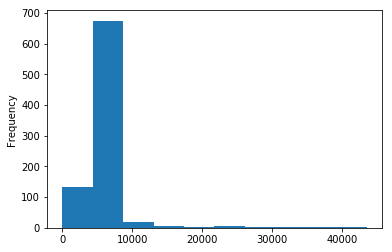

In [39]:
df['Total Loans'].plot.hist(); #ok

In [40]:
# Total Gift
df['Gift'].describe()

count      854.000000
mean     31855.762295
std       8912.442324
min          0.000000
25%      26000.000000
50%      33118.000000
75%      39038.250000
max      58230.000000
Name: Gift, dtype: float64

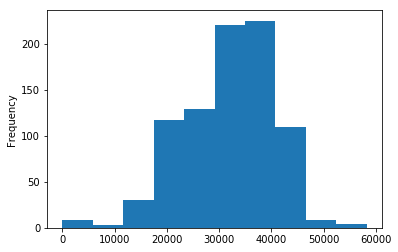

In [41]:
df['Gift'].plot.hist(); #ok

In [42]:
df['Need_Met'].describe()

count     854.000000
mean       92.596970
std       336.580627
min         0.000000
25%        63.822708
50%        78.902628
75%        87.706219
max      8888.888889
Name: Need_Met, dtype: float64

In [43]:
#GAP = Need - Gift - Work - Loan
df['GAP'].describe()

count       854.000000
mean       5518.402810
std        9864.003859
min      -44946.000000
25%           0.000000
50%        6717.000000
75%       11738.000000
max      103913.000000
Name: GAP, dtype: float64

In [44]:
df[['Need', 'Gift', 'Work', 'Total Loans', 'Budget', 'TotalAward', 'GAP', 'EFC_9_Month']][df['GAP'] < 0].head()

,Need,Gift,Work,Total Loans,Budget,TotalAward,GAP,EFC_9_Month
Student_Id,,,,,,,,
10317328,14648,33118,0,5500,48576,38618,-18470,33928.0
10317334,4650,20000,0,5500,58230,25500,-15350,53580.0
10317365,11888,30118,0,5500,48576,35618,-18230,36688.0
10317531,5876,27000,0,5500,58230,32500,-21124,52354.0
10317653,4590,20000,0,5500,58230,25500,-15410,53640.0


In [45]:
df2 = df[['Need', 'Gift', 'Work', 'Total Loans', 'Budget', 'TotalAward', 'GAP', 'EFC_9_Month']][df['GAP'] < 0]
df2.to_excel('3_res/negative_gap.xlsx')

In [46]:
df3 = df[['Need', 'Gift', 'Work', 'Total Loans', 'Budget', 'TotalAward', 'GAP', 'EFC_9_Month']]
df3.to_excel('3_res/all_gap.xlsx')

In [47]:
df[['Need']][df['GAP'] < 0].count() #106

Need    106
dtype: int64

In [48]:
df['Need_Unmet'] = df['GAP'] + df['Total Loans']
# df['Need_Unmet'][df['Need_Unmet']<0] = 0
df['Need_Unmet'].describe()

count       854.000000
mean      10863.347775
std       10843.825855
min      -39446.000000
25%        4185.000000
50%       12592.000000
75%       17437.750000
max      109413.000000
Name: Need_Unmet, dtype: float64

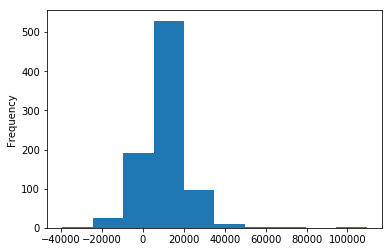

In [49]:
df['Need_Unmet'].plot.hist();

In [50]:
#Track students who have negative (Need-Gift-Work-loan). Check if they qualified for need based funding
df['Insufficient_FC'] = 0
df['Insufficient_FC'][df['Need'] - df['Gift'] - df['Work'] - df['Total Loans'] < 0] = 1
df['Insufficient_FC'].value_counts()

0    503
1    351
Name: Insufficient_FC, dtype: int64

In [51]:
df['Insufficient_FC'][df['Need_BasedAwardRecipient'] == "No"] = 0
df['Insufficient_FC'].value_counts()

0    755
1     99
Name: Insufficient_FC, dtype: int64

In [52]:
#Define Non-Need_aid
df['Non_Need_Aid'] = df['Total_Gift'] - df['Need_Aid']

# Academic Performance

In [53]:
df['HsGpa'][df['HsGpa'] > 5].describe()

count     1.0
mean     96.0
std       NaN
min      96.0
25%      96.0
50%      96.0
75%      96.0
max      96.0
Name: HsGpa, dtype: float64

In [54]:
df['HsGpa'][(df['HsGpa'] > 4) & (df['HsGpa'] <= 5)].describe()

count    78.000000
mean      4.297385
std       0.204203
min       4.020000
25%       4.100000
50%       4.265000
75%       4.430000
max       4.790000
Name: HsGpa, dtype: float64

In [55]:
df['HsGpa'][(df['HsGpa'] > 4) & (df['HsGpa'] <= 5)] = df['HsGpa']*0.8 #(Divided by 5 multiplied by 4)
df['HsGpa'][df['HsGpa'] > 5] = 3.84 # (96/100)*4 = 3.84
df['HsGpa'].describe()

count    852.000000
mean       3.346497
std        0.427584
min        2.050000
25%        3.059750
50%        3.400000
75%        3.680000
max        4.000000
Name: HsGpa, dtype: float64

In [56]:
df[(pd.isnull(df['Act_Comp'])) & (pd.isnull(df['Sat_Comp']))] #5 students with both missing ACT and SAT

,Housing_Status,TotalAward,InstitutionGift,Total_Gift,Percent_Need_Met,PercentNeedMetWithGift,Need_BasedAwardRecipient,State,SZip_Code,Country,Date_Birth,Distance,HsGpa,Act_Comp,Sat_Comp,Inst_Rat,Gender,Housing,Ethnic_Cd,Flag_Ethnic,Race1,Race2,Race3,Race4,Race5,Major1_Admit,Dept1_Admit,Budget,Flag_Pell_Eligible,EFC_9_Month,Flag_Underrepresented,Flag_First_Generation,Flag_Legacy,EXCL,GAP,Gift,I__G,Loan,Need,Need_Aid,Need_Level,Need_Met,Need_WGift,Net_Chgs,Net_Tuit,Work,Entry_Type,Ethnicity,Athlete_Status,International,Date_Of_Entry,Age,Total Loans,Need_Unmet,Insufficient_FC,Non_Need_Aid
Student_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10318239,R,0,0,0,0.0,0.0,No,,NaN,Panama,2000-12-06,NaN,NaN,NaN,NaN,NaN,M,R,NaN,Y,6.0,NaN,NaN,NaN,NaN,BU: General Studies Business,College of Business,58230,N,NaN,N,N,N,0,0,0,0,0,0,0,NaN,0.0,0.0,53528,40592,0,FRESHMAN TRADITIONAL,INTERNATIONAL,N,1,2019-09-01,18.0,0,0,0,0
10317478,R,0,0,0,0.0,0.0,No,,00000,Panama,2000-06-23,NaN,2.89,NaN,NaN,NaN,M,R,NaN,Y,6.0,NaN,NaN,NaN,NaN,BU: Management,College of Business,58230,N,NaN,N,N,N,0,0,0,0,0,0,0,NaN,0.0,0.0,53528,40592,0,FRESHMAN TRADITIONAL,INTERNATIONAL,N,1,2019-09-01,19.0,0,0,0,0
10316984,R,5000,5000,5000,0.0,0.0,No,,NaN,Panama,2000-11-27,NaN,2.50,NaN,NaN,NaN,M,R,NaN,Y,6.0,NaN,NaN,NaN,NaN,BU: Management,College of Business,48576,N,NaN,N,N,Y,0,0,5000,5000,0,0,0,NaN,0.0,0.0,48528,35592,0,FRESHMAN TRADITIONAL,INTERNATIONAL,N,1,2019-09-01,18.0,0,0,0,5000
10317477,R,3000,3000,3000,0.0,0.0,No,,00000,Panama,2000-11-13,NaN,2.40,NaN,NaN,NaN,M,R,NaN,Y,6.0,NaN,NaN,NaN,NaN,BU: Marketing,College of Business,48576,N,NaN,N,Y,N,0,0,3000,3000,0,0,0,NaN,0.0,0.0,50528,37592,0,FRESHMAN TRADITIONAL,INTERNATIONAL,N,1,2019-09-01,18.0,0,0,0,3000
10318597,R,25000,25000,25000,0.0,0.0,No,,10310,Thailand,2001-10-01,1162.0,3.64,NaN,NaN,NaN,F,R,NaN,N,3.0,3.0,6.0,6.0,NaN,MA: Musical Theatre,College of Music and Fine Arts,48576,N,NaN,N,Y,N,0,0,25000,25000,0,0,0,NaN,0.0,0.0,28528,15592,0,FRESHMAN TRADITIONAL,INTERNATIONAL,N,1,2019-09-01,17.0,0,0,0,25000


In [57]:
df['Act_Comp'].count()

541

In [58]:
df['Sat_Comp'].count()

376

In [59]:
df['Act_Comp'][(pd.notnull(df['Act_Comp'])) & (pd.notnull(df['Sat_Comp']))].count()

68

In [60]:
376 + 541 - 68 #ok

849

In [61]:
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1600) & (df['Sat_Comp'] >= 1570))] = 36
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1560) & (df['Sat_Comp'] >= 1530))] = 35
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1520) & (df['Sat_Comp'] >= 1490))] = 34
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1480) & (df['Sat_Comp'] >= 1450))] = 33
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1440) & (df['Sat_Comp'] >= 1420))] = 32
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1410) & (df['Sat_Comp'] >= 1390))] = 31
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1380) & (df['Sat_Comp'] >= 1360))] = 30
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1350) & (df['Sat_Comp'] >= 1330))] = 29
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1320) & (df['Sat_Comp'] >= 1300))] = 28
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1290) & (df['Sat_Comp'] >= 1260))] = 27
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1250) & (df['Sat_Comp'] >= 1230))] = 26
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1220) & (df['Sat_Comp'] >= 1200))] = 25
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1190) & (df['Sat_Comp'] >= 1160))] = 24
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1150) & (df['Sat_Comp'] >= 1130))] = 23
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1120) & (df['Sat_Comp'] >= 1100))] = 22
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1090) & (df['Sat_Comp'] >= 1060))] = 21
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1050) & (df['Sat_Comp'] >= 1030))] = 20
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 1020) & (df['Sat_Comp'] >= 990))] = 19
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 980) & (df['Sat_Comp'] >= 960))] = 18
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 950) & (df['Sat_Comp'] >= 920))] = 17
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 910) & (df['Sat_Comp'] >= 880))] = 16
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 870) & (df['Sat_Comp'] >= 830))] = 15
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 820) & (df['Sat_Comp'] >= 780))] = 14
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 770) & (df['Sat_Comp'] >= 730))] = 13
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 720) & (df['Sat_Comp'] >= 690))] = 12
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 680) & (df['Sat_Comp'] >= 650))] = 11
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 640) & (df['Sat_Comp'] >= 620))] = 10
df['Act_Comp'][(pd.isnull(df['Act_Comp'])) & ((df['Sat_Comp'] <= 610) & (df['Sat_Comp'] >= 590))] = 9

In [62]:
df['Act_Comp'].count() #good

849

In [63]:
df.columns

Index(['Housing_Status', 'TotalAward', 'InstitutionGift', 'Total_Gift',
       'Percent_Need_Met', 'PercentNeedMetWithGift',
       'Need_BasedAwardRecipient', 'State', 'SZip_Code', 'Country',
       'Date_Birth', 'Distance', 'HsGpa', 'Act_Comp', 'Sat_Comp', 'Inst_Rat',
       'Gender', 'Housing', 'Ethnic_Cd', 'Flag_Ethnic', 'Race1', 'Race2',
       'Race3', 'Race4', 'Race5', 'Major1_Admit', 'Dept1_Admit', 'Budget',
       'Flag_Pell_Eligible', 'EFC_9_Month', 'Flag_Underrepresented',
       'Flag_First_Generation', 'Flag_Legacy', 'EXCL', 'GAP', 'Gift', 'I__G',
       'Loan', 'Need', 'Need_Aid', 'Need_Level', 'Need_Met', 'Need_WGift',
       'Net_Chgs', 'Net_Tuit', 'Work', 'Entry_Type', 'Ethnicity',
       'Athlete_Status', 'International', 'Date_Of_Entry', 'Age',
       'Total Loans', 'Need_Unmet', 'Insufficient_FC', 'Non_Need_Aid'],
      dtype='object')

In [64]:
df['Total_Gift'].equals(df['Gift'])

True

In [65]:
df['InstitutionGift'].equals(df['I__G'])

True

In [66]:
df['Percent_Need_Met'].equals(df['Need_Met'])

True

In [67]:
df['PercentNeedMetWithGift'].equals(df['Need_WGift'])

True

In [68]:
df_final = df[['Housing_Status','Need_BasedAwardRecipient', 'Insufficient_FC', 'Need', 'Need_Aid', 'Non_Need_Aid', 'Total_Gift', 'InstitutionGift', 
                'Work', 'Need_Unmet', 'Total Loans', 'GAP', 'TotalAward', 'EFC_9_Month', 'Budget', 'State', 'Country', 'Distance', 'HsGpa', 
               'Act_Comp', 'Inst_Rat','Gender', 'Ethnicity', 'Major1_Admit', 'Dept1_Admit', 'Flag_Pell_Eligible', 'Flag_Underrepresented', 
               'Flag_First_Generation', 'Flag_Legacy', 'Athlete_Status', 'International', 'Age', 'Net_Chgs', 'Net_Tuit']]
df_final['pc_need_aid'] = df_final['Need_Aid']/df_final['Need']
df_final['pc_non_need_aid'] = df_final['Non_Need_Aid']/df_final['Need']
df_final['pc_need_unmet'] = df_final['Need_Unmet']/df_final['Need']
df_final['pc_gap_afterLoans'] = df_final['GAP']/df_final['Budget']
df_final['pc_loan_budget'] = df_final['Total Loans']/df['Budget']
df_final.head(10)

,Housing_Status,Need_BasedAwardRecipient,Insufficient_FC,Need,Need_Aid,Non_Need_Aid,Total_Gift,InstitutionGift,Work,Need_Unmet,Total Loans,GAP,TotalAward,EFC_9_Month,Budget,State,Country,Distance,HsGpa,Act_Comp,Inst_Rat,Gender,Ethnicity,Major1_Admit,Dept1_Admit,Flag_Pell_Eligible,Flag_Underrepresented,Flag_First_Generation,Flag_Legacy,Athlete_Status,International,Age,Net_Chgs,Net_Tuit,pc_need_aid,pc_non_need_aid,pc_need_unmet,pc_gap_afterLoans,pc_loan_budget
Student_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10318239,R,No,0,0,0,0,0,0,0,0,0,0,0,NaN,58230,,Panama,NaN,NaN,NaN,NaN,M,INTERNATIONAL,BU: General Studies Business,College of Business,N,N,N,N,N,1,18.0,53528,40592,NaN,NaN,NaN,0.000000,0.000000
10322215,R,No,0,0,0,0,0,0,0,0,0,0,0,NaN,58230,TX,United States,485.22,3.614,19.0,79.455,F,BLACK,CAS: Physics w/ concentration in Pre-Engineering,College of Arts and Sciences,N,Y,Y,N,Y,0,18.0,53528,40592,NaN,NaN,NaN,0.000000,0.000000
10317478,R,No,0,0,0,0,0,0,0,0,0,0,0,NaN,58230,,Panama,NaN,2.890,NaN,NaN,M,INTERNATIONAL,BU: Management,College of Business,N,N,N,N,N,1,19.0,53528,40592,NaN,NaN,NaN,0.000000,0.000000
10306799,R,No,0,0,0,13000,13000,13000,0,5500,5500,0,18500,81168.0,58230,LA,United States,11.17,2.050,23.0,59.250,F,MULTIRACIAL,CAS: Biological Sciences,College of Arts and Sciences,N,Y,N,N,N,0,19.0,40528,27592,NaN,inf,inf,0.000000,0.094453
10306833,R,No,0,0,0,17000,17000,17000,0,0,0,0,17000,NaN,48576,MO,United States,602.07,2.690,30.0,74.600,F,WHITE,MA: Mass Communications w/ concentration in Jo...,College of Arts and Sciences,N,N,N,N,N,0,19.0,36528,23592,NaN,inf,NaN,0.000000,0.000000
10307712,C,Yes,1,33705,11100,17500,28600,28600,0,7105,5500,1605,34100,14871.0,48576,LA,United States,2.52,3.333,23.0,78.499,F,MULTIRACIAL,CAS: Biology Pre-Health,College of Arts and Sciences,N,Y,Y,N,N,0,18.0,11992,11992,0.329328,0.519211,0.210800,0.033041,0.113225
10309113,R,No,0,0,0,17000,17000,17000,0,0,0,0,17000,NaN,48576,FL,United States,668.95,3.100,23.0,75.000,F,HISPANIC,CAS: General Studies,College of Arts and Sciences,N,Y,N,N,N,0,19.0,36528,23592,NaN,inf,NaN,0.000000,0.000000
10309804,R,Yes,1,36786,9786,24814,34600,24600,1600,5500,5500,0,41700,21444.0,58230,VT,United States,1376.38,3.710,22.0,83.400,F,WHITE,CAS: Psychology,College of Arts and Sciences,N,N,N,N,N,0,19.0,18928,5992,0.266025,0.674550,0.149513,0.000000,0.094453
10309914,R,No,0,0,0,19000,19000,19000,0,0,0,0,19000,NaN,48576,LA,United States,54.62,3.300,33.0,86.000,F,WHITE,CAS: Biochemistry Pre-Med,College of Arts and Sciences,N,N,Y,N,N,0,19.0,34528,21592,NaN,inf,NaN,0.000000,0.000000


In [69]:
df_final['Age'].value_counts()

18.0    676
19.0    103
17.0     69
20.0      4
16.0      1
22.0      1
Name: Age, dtype: int64

In [70]:
df_final['Age_Cat'] = ""
df_final['Age_Cat'][df_final['Age'] <= 17] = "Below 18"
df_final['Age_Cat'][df_final['Age'] >= 19] = "19 and above"
df_final['Age_Cat'][df_final['Age'] == 18] = "18"
df_final['Age_Cat'].value_counts()

18              676
19 and above    108
Below 18         70
Name: Age_Cat, dtype: int64

In [71]:
df_final['Housing_Status'][df_final['Housing_Status'] != "R"] = "NR"
df_final['Housing_Status'].value_counts()

R     734
NR    120
Name: Housing_Status, dtype: int64

In [72]:
df_final.describe()

,Insufficient_FC,Need,Need_Aid,Non_Need_Aid,Total_Gift,InstitutionGift,Work,Need_Unmet,Total Loans,GAP,TotalAward,EFC_9_Month,Budget,Distance,HsGpa,Act_Comp,Inst_Rat,International,Age,Net_Chgs,Net_Tuit,pc_need_aid,pc_non_need_aid,pc_need_unmet,pc_gap_afterLoans,pc_loan_budget
count,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,618.000000,854.000000,814.000000,852.000000,849.000000,848.000000,854.000000,854.000000,854.000000,854.000000,669.000000,847.000000,739.000000,854.000000,854.000000
mean,0.115925,35838.490632,11684.228337,20171.533958,31855.762295,27646.667447,951.288056,10863.347775,5344.944965,5518.402810,38151.995316,30081.448220,55935.154567,622.266929,3.346497,24.274441,80.651380,0.051522,18.051522,19854.532787,8736.237705,0.295482,inf,inf,0.094974,0.094436
std,0.320323,22853.835668,10164.258708,8228.098207,8912.442324,7199.063236,784.158499,10843.825855,4336.715724,9864.003859,11068.903527,72650.824607,5394.618448,675.354780,0.427584,4.189083,8.991158,0.221190,0.491109,10319.495528,8912.442324,0.162790,NaN,NaN,0.164230,0.075677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-39446.000000,0.000000,-44946.000000,0.000000,0.000000,16118.000000,0.230000,2.050000,13.000000,56.365000,0.000000,16.000000,-11797.000000,-17638.000000,0.000000,0.101322,-67.518519,-0.771870,0.000000
25%,0.000000,14665.500000,0.000000,14900.000000,26000.000000,23500.000000,0.000000,4185.000000,5500.000000,0.000000,31725.000000,2282.000000,58230.000000,16.090000,3.059750,21.000000,74.119500,0.000000,18.000000,12691.000000,1553.750000,0.191873,0.304505,0.218531,0.000000,0.094453
50%,0.000000,45908.000000,11995.000000,20500.000000,33118.000000,27100.000000,1600.000000,12592.000000,5500.000000,6717.000000,40131.500000,11348.500000,58230.000000,449.770000,3.400000,24.000000,80.900000,0.000000,18.000000,18769.000000,7474.000000,0.308174,0.465162,0.306490,0.123390,0.094453
75%,0.000000,56094.000000,19798.750000,25018.000000,39038.250000,33000.000000,1600.000000,17437.750000,5500.000000,11738.000000,46663.000000,31376.250000,58230.000000,1040.117500,3.680000,27.000000,88.012250,0.000000,18.000000,27410.000000,14592.000000,0.427615,1.686670,0.361416,0.202469,0.094453
max,1.000000,148576.000000,34895.000000,52814.000000,58230.000000,49356.000000,1600.000000,109413.000000,43500.000000,103913.000000,58330.000000,967792.000000,148576.000000,7703.770000,4.000000,35.000000,98.500000,1.000000,22.000000,53528.000000,40592.000000,0.768574,inf,inf,0.759574,0.747038


In [73]:
df_final['Net_Chgs_Cat'] = ""
df_final['Net_Chgs_Cat'][df_final['Net_Chgs'] <= 12500] = "$12,500 and below"
df_final['Net_Chgs_Cat'][(df_final['Net_Chgs'] > 12500) & (df_final['Net_Chgs'] <= 19000)] = "$12,501 to $19,000"
df_final['Net_Chgs_Cat'][(df_final['Net_Chgs'] > 19000) & (df_final['Net_Chgs'] <= 27500)] = "$19,001 to $27,500"
df_final['Net_Chgs_Cat'][(df_final['Net_Chgs'] > 27500)] = "Above $27,500"
df_final['Net_Chgs_Cat'].value_counts() #good

$12,501 to $19,000    240
Above $27,500         212
$19,001 to $27,500    208
$12,500 and below     194
Name: Net_Chgs_Cat, dtype: int64

In [74]:
df_final['Need_Cat'] = ""
df_final['Need_Cat'][df_final['Need'] <= 15000] = "$15,000 and below"
df_final['Need_Cat'][(df_final['Need'] > 15000) & (df_final['Need'] <= 46000)] = "$15,001 to $46,000"
df_final['Need_Cat'][(df_final['Need'] > 46000) & (df_final['Need'] <= 56000)] = "$46,001 to $56,000"
df_final['Need_Cat'][(df_final['Need'] > 56000)] = "Above $56,000"
df_final['Need_Cat'].value_counts() #good

$15,000 and below     217
Above $56,000         216
$15,001 to $46,000    212
$46,001 to $56,000    209
Name: Need_Cat, dtype: int64

In [75]:
df_final['Need_Aid_Cat'] = ""
df_final['Need_Aid_Cat'][df_final['Need_Aid'] <= 0] = "No Aid"
df_final['Need_Aid_Cat'][(df_final['Need_Aid'] > 0) & (df_final['Need_Aid'] <= 12000)] = "$12,000 and below"
df_final['Need_Aid_Cat'][(df_final['Need_Aid'] > 12000) & (df_final['Need_Aid'] <= 20000)] = "$12,001 to $20,000"
df_final['Need_Aid_Cat'][(df_final['Need_Aid'] > 20000)] = "Above $20,000"
df_final['Need_Aid_Cat'].value_counts() #good

No Aid                261
$12,001 to $20,000    214
Above $20,000         209
$12,000 and below     170
Name: Need_Aid_Cat, dtype: int64

In [76]:
df_final['Non_Need_Aid_Cat'] = ""
df_final['Non_Need_Aid_Cat'][df_final['Non_Need_Aid'] <= 15000] = "$15,000 and below"
df_final['Non_Need_Aid_Cat'][(df_final['Non_Need_Aid'] > 15000) & 
                             (df_final['Non_Need_Aid'] <= 20000)] = "$15,001 to $20,000"
df_final['Non_Need_Aid_Cat'][(df_final['Non_Need_Aid'] > 20000) & 
                             (df_final['Non_Need_Aid'] <= 25000)] = "$20,001 to $25,000"
df_final['Non_Need_Aid_Cat'][(df_final['Non_Need_Aid'] > 25000)] = "Above $25,000"
df_final['Non_Need_Aid_Cat'].value_counts() #good

Above $25,000         224
$15,000 and below     218
$20,001 to $25,000    209
$15,001 to $20,000    203
Name: Non_Need_Aid_Cat, dtype: int64

In [77]:
df_final['Total_Gift_Cat'] = ""
df_final['Total_Gift_Cat'][df_final['Total_Gift'] <= 26000] = "$26,000 and below"
df_final['Total_Gift_Cat'][(df_final['Total_Gift'] > 26000) & (df_final['Total_Gift'] <= 33000)] = "$26,001 to $33,000"
df_final['Total_Gift_Cat'][(df_final['Total_Gift'] > 33000) & (df_final['Total_Gift'] <= 39000)] = "$33,001 to $39,000"
df_final['Total_Gift_Cat'][(df_final['Total_Gift'] > 39000)] = "Above $39,000"
df_final['Total_Gift_Cat'].value_counts() #good

$33,001 to $39,000    222
$26,000 and below     218
Above $39,000         216
$26,001 to $33,000    198
Name: Total_Gift_Cat, dtype: int64

In [78]:
df_final['Total_Loans_Cat'] = "No Loans"
df_final['Total_Loans_Cat'][(df_final['Total Loans'] > 0) & (df_final['Total Loans'] <= 5500)] = "$5,500 and below"
df_final['Total_Loans_Cat'][(df_final['Total Loans'] > 5500)] = "Above $5,500"
df_final['Total_Loans_Cat'].value_counts() #good

$5,500 and below    670
No Loans            132
Above $5,500         52
Name: Total_Loans_Cat, dtype: int64

In [79]:
df_final['GAP_Cat'] = ""
df_final['GAP_Cat'][df_final['GAP'] <= 0] = "No Gap"
df_final['GAP_Cat'][(df_final['GAP'] > 0) & (df_final['GAP'] <= 7000)] = "$7,000 and below"
df_final['GAP_Cat'][(df_final['GAP'] > 7000) & (df_final['GAP'] <= 12000)] = "$7,001 to $12,000"
df_final['GAP_Cat'][(df_final['GAP'] > 12000)] = "Above $12,000"
df_final['GAP_Cat'].value_counts() #good

No Gap               300
$7,001 to $12,000    231
Above $12,000        191
$7,000 and below     132
Name: GAP_Cat, dtype: int64

In [80]:
df_final['Net_Chgs_Cat'] = ""
df_final['Net_Chgs_Cat'][df_final['Net_Chgs'] <= 12500] = "$12,500 and below"
df_final['Net_Chgs_Cat'][(df_final['Net_Chgs'] > 12500) & (df_final['Net_Chgs'] <= 19000)] = "$12,501 to $19,000"
df_final['Net_Chgs_Cat'][(df_final['Net_Chgs'] > 19000) & (df_final['Net_Chgs'] <= 27500)] = "$19,001 to $27,500"
df_final['Net_Chgs_Cat'][(df_final['Net_Chgs'] > 27500)] = "Above $27,500"
df_final['Net_Chgs_Cat'].value_counts() #good

$12,501 to $19,000    240
Above $27,500         212
$19,001 to $27,500    208
$12,500 and below     194
Name: Net_Chgs_Cat, dtype: int64

In [81]:
df_final['HS_GPA_Cat'] = "Missing"
df_final['HS_GPA_Cat'][df_final['HsGpa'] <= 3] = "3.00 and below"
df_final['HS_GPA_Cat'][(df_final['HsGpa'] > 3) & (df_final['HsGpa'] <= 3.40)] = "3.01 to 3.40"
df_final['HS_GPA_Cat'][(df_final['HsGpa'] > 3.40) & (df_final['HsGpa'] <= 3.70)] = "3.41 to 3.70"
df_final['HS_GPA_Cat'][(df_final['HsGpa'] > 3.70)] = "Above 3.70"
df_final['HS_GPA_Cat'].value_counts() #good

3.41 to 3.70      241
3.01 to 3.40      235
3.00 and below    194
Above 3.70        182
Missing             2
Name: HS_GPA_Cat, dtype: int64

In [82]:
df_final['ACT_Comp_Cat'] = "Missing"
df_final['ACT_Comp_Cat'][df_final['Act_Comp'] <= 21] = "21 and below"
df_final['ACT_Comp_Cat'][(df_final['Act_Comp'] > 21) & (df_final['HsGpa'] <= 24)] = "22 to 24"
df_final['ACT_Comp_Cat'][(df_final['Act_Comp'] > 24) & (df_final['HsGpa'] <= 27)] = "25 to 27"
df_final['ACT_Comp_Cat'][(df_final['Act_Comp'] > 27)] = "Above 27"
df_final['ACT_Comp_Cat'].value_counts() #good

21 and below    236
22 to 24        232
Above 27        212
25 to 27        169
Missing           5
Name: ACT_Comp_Cat, dtype: int64

In [83]:
df_final.head()

,Housing_Status,Need_BasedAwardRecipient,Insufficient_FC,Need,Need_Aid,Non_Need_Aid,Total_Gift,InstitutionGift,Work,Need_Unmet,Total Loans,GAP,TotalAward,EFC_9_Month,Budget,State,Country,Distance,HsGpa,Act_Comp,Inst_Rat,Gender,Ethnicity,Major1_Admit,Dept1_Admit,Flag_Pell_Eligible,Flag_Underrepresented,Flag_First_Generation,Flag_Legacy,Athlete_Status,International,Age,Net_Chgs,Net_Tuit,pc_need_aid,pc_non_need_aid,pc_need_unmet,pc_gap_afterLoans,pc_loan_budget,Age_Cat,Net_Chgs_Cat,Need_Cat,Need_Aid_Cat,Non_Need_Aid_Cat,Total_Gift_Cat,Total_Loans_Cat,GAP_Cat,HS_GPA_Cat,ACT_Comp_Cat
Student_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10318239,R,No,0,0,0,0,0,0,0,0,0,0,0,NaN,58230,,Panama,NaN,NaN,NaN,NaN,M,INTERNATIONAL,BU: General Studies Business,College of Business,N,N,N,N,N,1,18.0,53528,40592,NaN,NaN,NaN,0.0,0.000000,18,"Above $27,500","$15,000 and below",No Aid,"$15,000 and below","$26,000 and below",No Loans,No Gap,Missing,Missing
10322215,R,No,0,0,0,0,0,0,0,0,0,0,0,NaN,58230,TX,United States,485.22,3.614,19.0,79.455,F,BLACK,CAS: Physics w/ concentration in Pre-Engineering,College of Arts and Sciences,N,Y,Y,N,Y,0,18.0,53528,40592,NaN,NaN,NaN,0.0,0.000000,18,"Above $27,500","$15,000 and below",No Aid,"$15,000 and below","$26,000 and below",No Loans,No Gap,3.41 to 3.70,21 and below
10317478,R,No,0,0,0,0,0,0,0,0,0,0,0,NaN,58230,,Panama,NaN,2.890,NaN,NaN,M,INTERNATIONAL,BU: Management,College of Business,N,N,N,N,N,1,19.0,53528,40592,NaN,NaN,NaN,0.0,0.000000,19 and above,"Above $27,500","$15,000 and below",No Aid,"$15,000 and below","$26,000 and below",No Loans,No Gap,3.00 and below,Missing
10306799,R,No,0,0,0,13000,13000,13000,0,5500,5500,0,18500,81168.0,58230,LA,United States,11.17,2.050,23.0,59.250,F,MULTIRACIAL,CAS: Biological Sciences,College of Arts and Sciences,N,Y,N,N,N,0,19.0,40528,27592,NaN,inf,inf,0.0,0.094453,19 and above,"Above $27,500","$15,000 and below",No Aid,"$15,000 and below","$26,000 and below","$5,500 and below",No Gap,3.00 and below,22 to 24
10306833,R,No,0,0,0,17000,17000,17000,0,0,0,0,17000,NaN,48576,MO,United States,602.07,2.690,30.0,74.600,F,WHITE,MA: Mass Communications w/ concentration in Jo...,College of Arts and Sciences,N,N,N,N,N,0,19.0,36528,23592,NaN,inf,NaN,0.0,0.000000,19 and above,"Above $27,500","$15,000 and below",No Aid,"$15,001 to $20,000","$26,000 and below",No Loans,No Gap,3.00 and below,Above 27


In [84]:
df_final['Housing_Status'][df_final['Housing_Status'] == "R"] = "Resident"
df_final['Housing_Status'][df_final['Housing_Status'] == "NR"] = "Non-Resident"
df_final['Housing_Status'].value_counts()

Resident        734
Non-Resident    120
Name: Housing_Status, dtype: int64

In [85]:
df_final['Need_BasedAwardRecipient'][df_final['Need_BasedAwardRecipient'] == "No"] = "Non-Recipient"
df_final['Need_BasedAwardRecipient'][df_final['Need_BasedAwardRecipient'] == "Yes"] = "Recipient"
df_final['Need_BasedAwardRecipient'].value_counts()

Recipient        593
Non-Recipient    261
Name: Need_BasedAwardRecipient, dtype: int64

In [86]:
df_final['Flag_Pell_Eligible'][df_final['Flag_Pell_Eligible'] == "N"] = "Not Pell Eligible"
df_final['Flag_Pell_Eligible'][df_final['Flag_Pell_Eligible'] == "Y"] = "Pell Elligible"
df_final['Flag_Pell_Eligible'].value_counts()

Not Pell Eligible    507
Pell Elligible       347
Name: Flag_Pell_Eligible, dtype: int64

In [87]:
df_final['Flag_Underrepresented'][df_final['Flag_Underrepresented'] == "N"] = "Not Underrepresented"
df_final['Flag_Underrepresented'][df_final['Flag_Underrepresented'] == "Y"] = "Underrepresented Minorities"
df_final['Flag_Underrepresented'].value_counts()

Underrepresented Minorities    471
Not Underrepresented           383
Name: Flag_Underrepresented, dtype: int64

In [88]:
df_final['Flag_First_Generation'][df_final['Flag_First_Generation'] == "N"] = "Not First Generation"
df_final['Flag_First_Generation'][df_final['Flag_First_Generation'] == "Y"] = "First Generation"
df_final['Flag_First_Generation'].value_counts()

Not First Generation    587
First Generation        267
Name: Flag_First_Generation, dtype: int64

In [89]:
df_final['Flag_Legacy'][df_final['Flag_Legacy'] == "N"] = "Not Legacy Student"
df_final['Flag_Legacy'][df_final['Flag_Legacy'] == "Y"] = "Legacy Student"
df_final['Flag_Legacy'].value_counts()

Not Legacy Student    754
Legacy Student        100
Name: Flag_Legacy, dtype: int64

In [90]:
df_final['Athlete_Status'][df_final['Athlete_Status'] == "N"] = "Not Athlete"
df_final['Athlete_Status'][df_final['Athlete_Status'] == "Y"] = "Athlete"
df_final['Athlete_Status'].value_counts()

Not Athlete    783
Athlete         71
Name: Athlete_Status, dtype: int64

In [91]:
df_final['Insufficient_FC1'] = "Sufficient Family Contribution"
df_final['Insufficient_FC1'][df_final['Insufficient_FC'] == 1] = "Insufficient Family Contribution"
df_final['Insufficient_FC1'].value_counts()

Sufficient Family Contribution      755
Insufficient Family Contribution     99
Name: Insufficient_FC1, dtype: int64

In [92]:
df_final['International1'] = "International"
df_final['International1'][df_final['International'] == 0] = "Domestic"
df_final['International1'].value_counts()

Domestic         810
International     44
Name: International1, dtype: int64

In [93]:
df_final.drop(['Insufficient_FC', 'International'], axis = 1, inplace=True)

In [94]:
df_final.rename(columns={"International1": "International", "Insufficient_FC1": "Insufficient_FC"}, inplace = True)
df_final.head()

,Housing_Status,Need_BasedAwardRecipient,Need,Need_Aid,Non_Need_Aid,Total_Gift,InstitutionGift,Work,Need_Unmet,Total Loans,GAP,TotalAward,EFC_9_Month,Budget,State,Country,Distance,HsGpa,Act_Comp,Inst_Rat,Gender,Ethnicity,Major1_Admit,Dept1_Admit,Flag_Pell_Eligible,Flag_Underrepresented,Flag_First_Generation,Flag_Legacy,Athlete_Status,Age,Net_Chgs,Net_Tuit,pc_need_aid,pc_non_need_aid,pc_need_unmet,pc_gap_afterLoans,pc_loan_budget,Age_Cat,Net_Chgs_Cat,Need_Cat,Need_Aid_Cat,Non_Need_Aid_Cat,Total_Gift_Cat,Total_Loans_Cat,GAP_Cat,HS_GPA_Cat,ACT_Comp_Cat,Insufficient_FC,International
Student_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10318239,Resident,Non-Recipient,0,0,0,0,0,0,0,0,0,0,NaN,58230,,Panama,NaN,NaN,NaN,NaN,M,INTERNATIONAL,BU: General Studies Business,College of Business,Not Pell Eligible,Not Underrepresented,Not First Generation,Not Legacy Student,Not Athlete,18.0,53528,40592,NaN,NaN,NaN,0.0,0.000000,18,"Above $27,500","$15,000 and below",No Aid,"$15,000 and below","$26,000 and below",No Loans,No Gap,Missing,Missing,Sufficient Family Contribution,International
10322215,Resident,Non-Recipient,0,0,0,0,0,0,0,0,0,0,NaN,58230,TX,United States,485.22,3.614,19.0,79.455,F,BLACK,CAS: Physics w/ concentration in Pre-Engineering,College of Arts and Sciences,Not Pell Eligible,Underrepresented Minorities,First Generation,Not Legacy Student,Athlete,18.0,53528,40592,NaN,NaN,NaN,0.0,0.000000,18,"Above $27,500","$15,000 and below",No Aid,"$15,000 and below","$26,000 and below",No Loans,No Gap,3.41 to 3.70,21 and below,Sufficient Family Contribution,Domestic
10317478,Resident,Non-Recipient,0,0,0,0,0,0,0,0,0,0,NaN,58230,,Panama,NaN,2.890,NaN,NaN,M,INTERNATIONAL,BU: Management,College of Business,Not Pell Eligible,Not Underrepresented,Not First Generation,Not Legacy Student,Not Athlete,19.0,53528,40592,NaN,NaN,NaN,0.0,0.000000,19 and above,"Above $27,500","$15,000 and below",No Aid,"$15,000 and below","$26,000 and below",No Loans,No Gap,3.00 and below,Missing,Sufficient Family Contribution,International
10306799,Resident,Non-Recipient,0,0,13000,13000,13000,0,5500,5500,0,18500,81168.0,58230,LA,United States,11.17,2.050,23.0,59.250,F,MULTIRACIAL,CAS: Biological Sciences,College of Arts and Sciences,Not Pell Eligible,Underrepresented Minorities,Not First Generation,Not Legacy Student,Not Athlete,19.0,40528,27592,NaN,inf,inf,0.0,0.094453,19 and above,"Above $27,500","$15,000 and below",No Aid,"$15,000 and below","$26,000 and below","$5,500 and below",No Gap,3.00 and below,22 to 24,Sufficient Family Contribution,Domestic
10306833,Resident,Non-Recipient,0,0,17000,17000,17000,0,0,0,0,17000,NaN,48576,MO,United States,602.07,2.690,30.0,74.600,F,WHITE,MA: Mass Communications w/ concentration in Jo...,College of Arts and Sciences,Not Pell Eligible,Not Underrepresented,Not First Generation,Not Legacy Student,Not Athlete,19.0,36528,23592,NaN,inf,NaN,0.0,0.000000,19 and above,"Above $27,500","$15,000 and below",No Aid,"$15,001 to $20,000","$26,000 and below",No Loans,No Gap,3.00 and below,Above 27,Sufficient Family Contribution,Domestic


In [95]:
pd.crosstab(df_final.Ethnicity, df_final.Flag_Underrepresented)


Flag_Underrepresented,Not Underrepresented,Underrepresented Minorities
Ethnicity,,
BLACK,0,176
HISPANIC,2,170
INTERNATIONAL,35,9
MULTIRACIAL,0,62
OTHER,0,28
WHITE,346,26


In [96]:
df_final['Flag_Underrepresented'][df_final['Ethnicity']== "WHITE"] = "Not Underrepresented"
pd.crosstab(df_final.Ethnicity, df_final.Flag_Underrepresented)

Flag_Underrepresented,Not Underrepresented,Underrepresented Minorities
Ethnicity,,
BLACK,0,176
HISPANIC,2,170
INTERNATIONAL,35,9
MULTIRACIAL,0,62
OTHER,0,28
WHITE,372,0


In [97]:
df_final.to_excel('3_res/retention_clean.xlsx')

In [100]:
df_final['State'].unique()

array(['', 'TX', 'LA', 'MO', 'FL', 'VT', 'CA', 'TN', 'PR', 'AE', 'AL',
       'MA', 'PA', 'OR', 'DC', 'AR', 'MD', 'VA', 'GA', 'NC', 'OH', 'IL',
       'MI', 'NJ', 'CT', 'NY', 'RI', 'WA', 'UT', 'NV', 'NM', 'WI', 'MN',
       'ME', 'CO', 'NE', 'SC', 'GU', 'KY', 'MS', 'DE', 'AZ', 'OK', 'KS',
       'WV', 'IN', 'NH', 'AK'], dtype=object)

In [102]:
df_final['Country'].unique()

array(['Panama', 'United States', 'Honduras', 'Costa Rica', 'Colombia',
       'Canada', 'Thailand', 'Italy', 'New Zealand', 'Nicaragua',
       'Dominican Republic', 'Guatemala', 'South Korea', 'Ghana',
       'Brazil', 'Angola', 'France', 'El Salvador', 'Haiti', 'Ecuador',
       'Peru', 'Spain', 'Philippines'], dtype=object)